## 1) Fetching the DataSet for the Neural Network:

In [434]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import sys
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

# Load MNIST dataset using TensorFlow:
# X_train and X_test: Type = numpy.ndarray:
# X_train: (60000, 28, 28) (60,000 images, each of size 28x28 pixels):
# X_test: (10000, 28, 28) (10,000 test images, each of size 28x28 pixels)

# Y_train and Y_test: Type = numpy.ndarray:
# Y_train: (60000,) (Contains 60,000 integer labels, one for each training image):
# Y_test: (10000,) (Contains 10,000 integer labels, one for each test image):
# The values are integers ranging from 0 to 9, corresponding to the digit each image represents.
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

# Display shapes of the datasets
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {Y_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Testing labels shape: {Y_test.shape}")

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)


## 2) Display snapshot of the dataset:

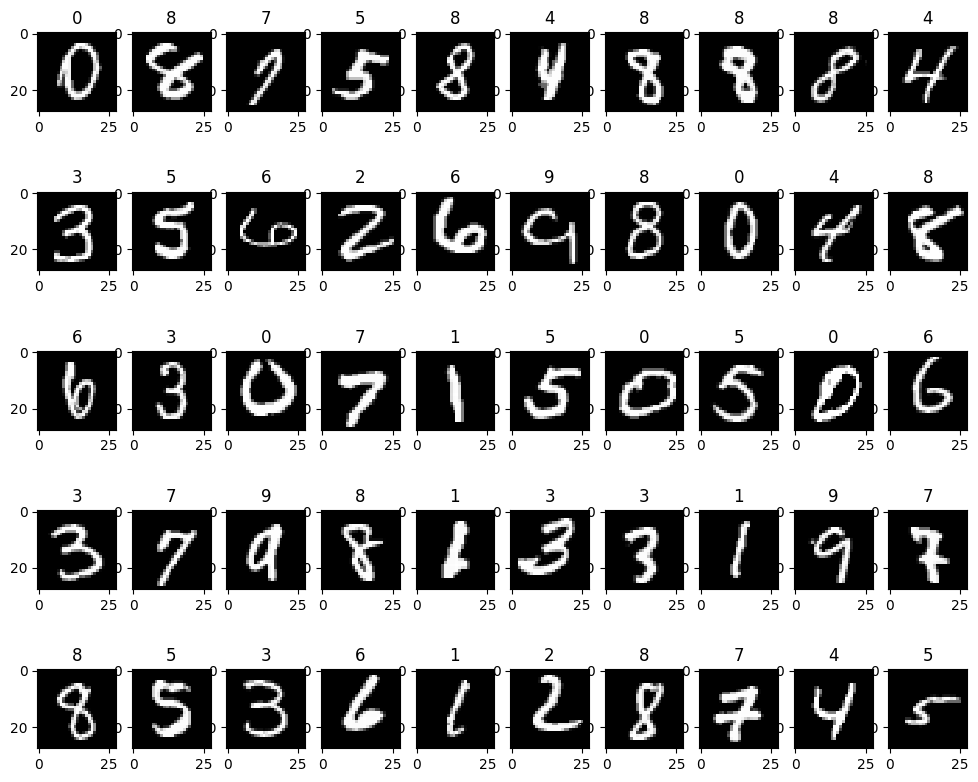

In [342]:
import matplotlib.pyplot as plt 
def show_image(image, shape, label="", cmp=None):
    '''
    image: DataSet comprising of images  stored as a flattened 1D array of size 784
    shape: Specifies the dimensions that the image should be reshaped: 28x28 pixels
    label: Label y of the digit associated with the image
    cmp: Colormap used to display the image
    '''
    # Reshapes the image from a flattened 1D array (e.g., of 784 pixels) into a 2D array (28x28 pixels):
    img = np.reshape(image, shape)
    # Uses matplotlib to display the image in the specified colormap:
    plt.imshow(img, cmap=cmp, interpolation='none')
    # Sets the title of the image to the provided label (the digit):
    plt.title(label)

# Create the figure with the specified size:
plt.figure(figsize=(12,10))
# Define the grid of images (rows=5, columns=10):
y, x = 5,10
for i in range(0,(y*x)):
    # Tells matplotlib where to add the image:
    plt.subplot(y, x, i+1)
    # Select a random image index ni from the training data:
    ni = np.random.randint(0,X_train.shape[0],1)[0]
    # # Display the image with its label
    show_image(X_train[ni],(28,28), Y_train[ni], cmp="gray")
# Show the entire figure:
plt.show()

## 3) Distribution of labels in the training dataset:

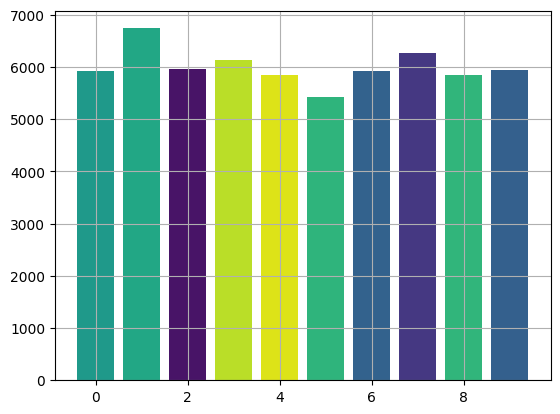

In [264]:
def get_digits_distribution_training(Y_train: np.ndarray):
    '''
    Y_train: 60000X1 label matrix
    '''
    # 3.1) Create a numpy array of shape 10 (0->9):
    hist = np.ones(10)
    # 3.2) Loop over Y_train matrix:
    for y in Y_train:
        hist[y] += 1
        
    # 3.3) Define a color array that will store a random color for a unic label y:
    colors = []
    for i in range(10):
        colors.append(plt.get_cmap('viridis')(np.random.uniform(0.0,1.0,1)[0]))
        
    # 3.4) Create a bar chart:
    bar = plt.bar(np.arange(10), hist, 0.8, color=colors)
    plt.grid()
    plt.show()

get_digits_distribution_training(Y_train)

## 4) Feature normalization using Min-Max scaling:

In [435]:
import numpy as np
def min_max_normalization(X_train: np.ndarray, X_test: np.ndarray) -> tuple:
    '''
    - Purpose: Normalize the dataset using Min-Max scaling so that each pixels ranges btw [0, 1]
    - Formula: Xnorm = (X - min)/(max - min)
    - Parameters:
      X_train: Feature matrix (samples, height, width)
      X_test: Feature matrix (samples, height, width)
    - Returns: Tuple of normalized training & testing feature set
    '''
    # Find the min and max value in the training dataset:
    min_val = np.min(X_train)
    max_val = np.max(X_train)
    # Normalize features in train & test dataset:
    X_train_norm = (X_train - min_val) / (max_val - min_val)
    X_test_norm = (X_test - min_val) / (max_val - min_val)

    return X_train_norm, X_test_norm
    

X_train_norm, X_test_norm = min_max_normalization(X_train, X_test)
# Verify the min and max of the training & test featureset to ensure normalization was performed correctly
print("Train MIN: %.2f" % np.min(X_train_norm))
print("Train MAX: %.2f" % np.max(X_train_norm))
print("Test MIN: %.2f" % np.min(X_test_norm))
print("Test MAX: %.2f" % np.max(X_test_norm))


Train MIN: 0.00
Train MAX: 1.00
Test MIN: 0.00
Test MAX: 1.00


## 5) Define initial weights & biases matrices:

In [329]:
def Create_Weights_Biases():
    '''
    - Purpose: Creates weights & biases
    - Return: List of weights & biases:
      w1: Weight matrix 1 for the first layer (784, 500)
      w2: Weight matrix 2 for the second layer (500, 300)
      w3: Weight matrix 3 for the third layer (300, 10)
      b1: Biais Vector 1 for the first layer (1, 500)
      b2: Biais Vector 2 for the second layer (1, 300)
      b3: Biais Vector 3 for the third layer (1, 10)
    '''
    nbr_inputs = 784 # Input layers has 784 neurons (1 per pixels in each images):
    wl1 = 500 # Nbr of neurons in the first layer:
    wl2 = 300 # Nbr of neurons in the second layer:
    nclass = 10 # Nbr of neurons in the output layer (one for each digit 0–9).

    # np.random.normal: Ensure the weights are initialized randomly from a normal distribution.
    # Each matrices will gave a shape as example [nbr_inputs, wl1] have a mean = 0 & STD = nbr_inputs**-0.5.
    # Purpose: Prevents weights from being too large or too small at initialization.
    # Purpose: Helps avoid problems like vanishing or exploding gradients during training.
    # Intuition: scaling W and b based on the nbr of inputs, the values will neither be too large nor too small
    
    # Layer 1:
    w1 = np.random.normal(0, np.sqrt(2/nbr_inputs), (nbr_inputs, wl1))
    b1 = np.zeros((1,wl1))
    # Layer 2:
    w2 = np.random.normal(0, np.sqrt(2/wl1), (wl1, wl2))
    b2 = np.zeros((1, wl2))
    # Layer 3:
    w3 = np.random.normal(0, np.sqrt(2/wl2), (wl2, nclass))
    b3 = np.zeros((1, nclass))

    return [w1, b1, w2, b2, w3, b3]

## 6) Define the activation function σ(Z) for the hidden layers:

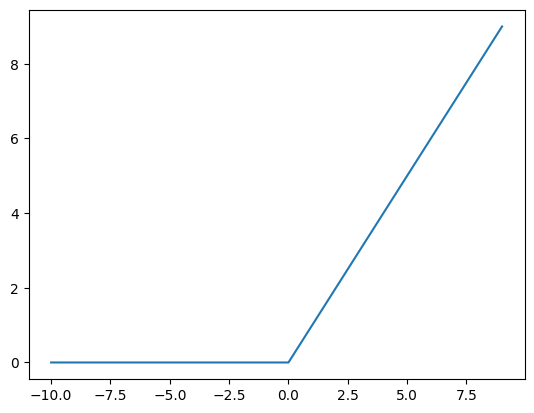

In [330]:
def ReLu(X: np.ndarray, derivative=False) -> np.ndarray:
    '''
    - Purpose: activates the matrices at hidden layer:
    - Parameters:
        X: Matrix
    - Return 0 for negative inputs and the input itself for positive values. 
    '''
    if not derivative:
        return np.maximum(0,X)
    else:
        return (X>1e-8).astype(float)


x = np.arange(20)-10
relu = ReLu(x)
plt.plot(x, relu)
plt.show()

## 7) Define the Softmax function to transform output layer matrix into a set of probabilities:

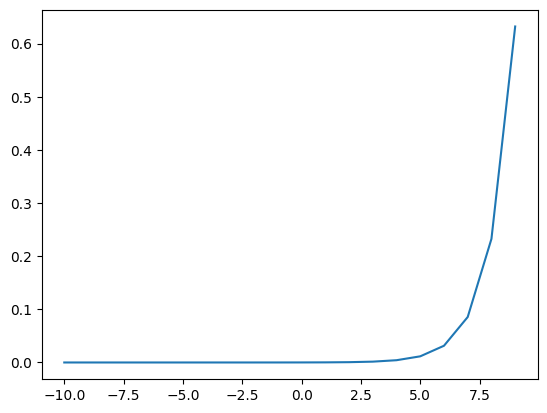

In [331]:
### 6) Define the Softmax activation function:
def Softmax(X: np.ndarray) -> np.ndarray:
    """
    - Purpose: Perform the softmax function to transform matrix from output lvl into a probability of belonging to a class
    - X: Matrix from output layer (shape: [batch_size, num_classes])
    Returns:
    - Softmax output (shape: [batch_size, num_classes])
    """
    X = X - np.max(X, axis=1, keepdims=True) # Stability:
    exp_values = np.exp(X)
    exp_values = np.clip(exp_values, 1e-8, None) # Prevent 0
    return exp_values / np.sum(exp_values, axis=1, keepdims=True)

x = np.arange(20)-10
softmax = Softmax([x])
plt.plot(x, softmax[0])
plt.show()

## 8) Define dropout function to deactivate a % of neurones in the forward pass to prevent overfitting:

In [436]:
def Dropout(X: np.ndarray, dropout_percent: float, is_training: bool) -> np.ndarray:
    '''
    - Purpose: Used during training to randomly deactivate a certain percentage of neurons at each step in the forward pass
    - Purpose: Prevent overfitting by reducing the network reliance on specific neurons and force to generalize better
    - Parameters:
      X: Matrix
      dropout_percent: Fraction of neurons that will be dropped during each forward pass
    - Return: Matrix of the same dimensions
    '''
    if not is_training or dropout_percent == 0:
        return X
    
    # Create a binary mask with the same shape as X
    mask = (np.random.rand(*X.shape) > dropout_percent).astype(float)
    
    # Scale the mask to ensure the expected value of the output remains the same
    mask /= (1 - dropout_percent)
    
    # Apply the mask to X
    return X * mask
# Example
#   [[1, 2, 3],       [[1, 0, 1]          [[1, 0, 3],
# X=[4, 5, 6],   mask=[0, 1, 1],   output=[0, 5, 6],
#   [7, 8, 9]]        [1, 1, 0]]          [7, 8, 0]]

## 9) Define a prediction function (forward pass):

In [437]:
def predict(weights_biases, X, dropout_percent=0, training=True):
    # Forward pass through first layer
    w1, b1, w2, b2, w3, b3 = weights_biases
    first = np.dot(X, w1) + b1
    first = ReLu(first)
    #print(f"Shape of first before dropout: {first.shape}")
    if training and dropout_percent > 0:  # Apply dropout to hidden layers
        first = Dropout(first, dropout_percent, is_training=True)
        #print(f"Shape of first after dropout: {first.shape}")

    # Forward pass through second layer
    second = np.dot(first, w2) + b2
    second = ReLu(second)
    if training and dropout_percent > 0:  # Apply dropout to hidden layers
        second = Dropout(second, dropout_percent, is_training=True)

    # Output layer (no dropout)
    output = np.dot(second, w3) + b3
    output = Softmax(output)  # Apply Softmax
    #print("Shapes during predict function:")
    #print(f"Shape of first: {first.shape}")
    #print(f"Shape of second: {second.shape}")
    #print(f"Shape of output: {output.shape}")

    return [first, second, output]

## 10) Define the cost function => objective function to minimize:

In [390]:
import numpy as np
def safe_log(Y: np.ndarray) -> np.ndarray:
    '''
    - Purpose: Applies log with clipping to avoid log(0)
    - Parameter: Y Matrix where each element represents a probability
    '''
    Y_clipped = np.clip(Y, 1e-15, None) # Prevent log(0)
    return np.log(Y_clipped)


def cost(Y_predict: np.ndarray, Y_right: np.ndarray, weights_biases: list, nabla: float) -> float:
    """
    - Purpose: Cross-entropy loss with L2 regularization (weights only)
    - Parameters:
        Y_predict: Predicted outputs (shape: [batch_size, num_classes])
        Y_right: True labels (shape: [batch_size, num_classes])
        weights_biases: list of matrix (W1, W2, W3, B1, B2, B3)
        nabla: L2 regularization factor
    """
    # Ensure one-hot encoded labels:
    if Y_right.ndim == 1:
        Y_right = np.eye(10)[Y_right] # Convert to one-hot

    # Cross-entropy term:
    loss = -np.mean(Y_right * safe_log(Y_predict))
    # L2 regularization (exclude biais):
    w1, w2, w3, _, _, _ = weights_biases
    l2_term = nabla/2 * (np.sum(w1**2)) + np.sum((w2**2)) + np.sum((w3**2))
    return loss + l2_term

## 11) Define a function to measure accuracy => % of times ypred matches ytrue:

In [391]:
def accuracy(output, y):
    hit = 0
    output = np.argmax(output, axis=1)
    y = np.argmax(y, axis=1)
    for y in zip(output, y):
        if(y[0]==y[1]):
            hit += 1

    p = (hit*100)/output.shape[0]
    return p

## 12) Define a function to perform SGD for the training step:

In [336]:
def SGD(weights_biases, X, t, outputs, eta, gamma, nabla, cache=None):
    '''
    - Purpose: Compute SGD for training the NN
    - Parameters:
        weights_biases: List of all weights & biaises
        X: Feature matrix
        t: True Label matrix
        outputs: List containing results from 1st, 2nd hidden layers and output layers
        eta: Learning rate controlling how big weights are updated
        gamma: Momentum, factor to accelerate convergence and stabilize the optimization process
        nabla: Regularization coeff that penalizes large weights (L2 Regulatization)
        cache: Stores the previous updates to the weights & biaises used for momentum
    '''   
    w1, b1, w2, b2, w3, b3 = weights_biases
    
    # Initialize cache
    if cache is None:
        vw1, vb1 = np.zeros_like(w1), np.zeros_like(b1)
        vw2, vb2 = np.zeros_like(w2), np.zeros_like(b2)
        vw3, vb3 = np.zeros_like(w3), np.zeros_like(b3)
    else:
        vw1, vb1, vw2, vb2, vw3, vb3 = cache

    first, second, y = outputs
    batch_size = X.shape[0]

    # Output layer gradient (critical fix)
    w3_delta = (y - t)  # Shape: (batch_size, 10)

    # Hidden layer gradients (dimension fixes)
    w2_delta = (w3_delta @ w3.T) * ReLu(second, derivative=True)  # (batch, 300)
    w1_delta = (w2_delta @ w2.T) * ReLu(first, derivative=True)   # (batch, 500)

    # Learning rate scaling
    eta_scaled = eta / batch_size

    # Weight updates (matrix dimension fixes)
    vw3 = gamma * vw3 + (second.T @ w3_delta) * eta_scaled + eta * nabla * w3
    vb3 = gamma * vb3 + np.sum(w3_delta, axis=0) * eta_scaled

    vw2 = gamma * vw2 + (first.T @ w2_delta) * eta_scaled + eta * nabla * w2
    vb2 = gamma * vb2 + np.sum(w2_delta, axis=0) * eta_scaled

    vw1 = gamma * vw1 + (X.T @ w1_delta) * eta_scaled + eta * nabla * w1
    vb1 = gamma * vb1 + np.sum(w1_delta, axis=0) * eta_scaled

    # Apply updates
    w3 -= vw3
    b3 -= vb3
    w2 -= vw2
    b2 -= vb2
    w1 -= vw1
    b1 -= vb1

#    print("Shapes of matrices returned by the SGD function")
#    print(f"Shape of W1: {w1.shape}")
#    print(f"Shape of b1: {b1.shape}")
#    print(f"Shape of vw1: {vw1.shape}")
#    print(f"Shape of VB1: {vb1.shape}")
    
#    print(f"Shape of W2: {w2.shape}")
#    print(f"Shape of b2: {b2.shape}")
#    print(f"Shape of vw2: {vw2.shape}")
#    print(f"Shape of VB2: {vb2.shape}")

#    print(f"Shape of W3: {w3.shape}")
#    print(f"Shape of b3: {b3.shape}")
#    print(f"Shape of vw3: {vw3.shape}")
#    print(f"Shape of VB3: {vb3.shape}")

    return [w1, b1, w2, b2, w3, b3], [vw1, vb1, vw2, vb2, vw3, vb3]

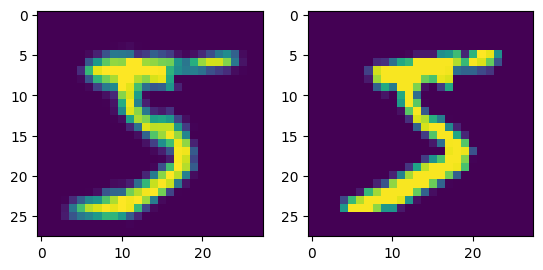

In [438]:
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

def elastic_transform(image, alpha, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1))

    return map_coordinates(image, indices, order=1).reshape(shape)


x_t = np.array([elastic_transform(xx.reshape(28,28),15,3).reshape(784) for xx in X_train[0:10]])
plt.subplot(1,2,1)
plt.imshow(x_t[0].reshape(28,28))
plt.subplot(1,2,2)
plt.imshow(X_train[0].reshape(28,28))

In [439]:
def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]  # Vectorized implementation

def run(weights_biases, X_train, Y_train, X_valid, Y_valid, 
        epochs=10, nbatchs=25, alpha=1e-3, decay=0, momentum=0, 
        l2=0.001, dropout_percent=0):
    
    # Ensure labels are integers (not one-hot yet)
    Y_train = Y_train.astype(int)
    Y_valid = Y_valid.astype(int)
    
    num_samples = X_train.shape[0]
    history = {"train": [], "valid": []}
    cache = None
    
    # Learning rate decay
    original_lr = alpha
    
    for epoch in range(epochs):
        indices = np.random.permutation(num_samples)
        train_loss, train_acc = 0, 0
        alpha = original_lr / (1 + decay * epoch)  # Decay
        
        for batch in range(0, num_samples, nbatchs):
            batch_idx = indices[batch:batch+nbatchs]
            X_batch = X_train[batch_idx]
            Y_batch = Y_train[batch_idx]
            
            # Elastic transform (ensure 2D input)
            X_batch = np.array([
                elastic_transform(img.reshape(28,28), 5, 1).flatten()
                for img in X_batch
            ])
            
            # Forward pass (training mode)
            outputs = predict(weights_biases, X_batch, 
                             dropout_percent=dropout_percent, 
                             training=True)
            y_pred = outputs[-1]  # Shape: (batch_size, 10)
            
            # One-hot encode true labels for loss calculation
            Y_batch_onehot = one_hot_encode(Y_batch)
            
            # Compute loss and accuracy
            loss = cost(y_pred, Y_batch_onehot, weights_biases, l2)
            pred_labels = np.argmax(y_pred, axis=1)
            acc = np.mean(pred_labels == Y_batch)  # Use original labels
            
            # Backpropagation
            weights_biases, cache = SGD(weights_biases, X_batch, Y_batch_onehot,
                                       outputs, alpha, momentum, l2, cache)
            
            # Track metrics
            train_loss += loss * X_batch.shape[0]
            train_acc += acc * X_batch.shape[0]
        
        # Validation (no dropout)
        valid_outputs = predict(weights_biases, X_valid, 
                               dropout_percent=0, training=False)
        valid_pred = valid_outputs[-1]
        valid_loss = cost(valid_pred, one_hot_encode(Y_valid), weights_biases, l2)
        valid_acc = np.mean(np.argmax(valid_pred, axis=1) == Y_valid)
        
        # Store metrics
        history["train"].append((train_loss/num_samples, train_acc/num_samples))
        history["valid"].append((valid_loss, valid_acc))
        
        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_loss/num_samples:.4f} | "
              f"Valid Acc: {valid_acc:.4f}")
    
    return weights_biases, history

In [440]:
# Flatten images BEFORE splitting
X_train_flat = X_train_norm.reshape(-1, 784)
X_test_flat = X_test_norm.reshape(-1, 784)

# Shuffle and split
index_data = np.random.permutation(X_train_flat.shape[0])
X_valid = X_train_flat[index_data[:VALID_SIZE]]
X_train_new = X_train_flat[index_data[VALID_SIZE:]]

print(X_train_new.shape, X_valid.shape)  # Should show (54000, 784) and (6000, 784)
print(f"Training Data min:", np.min(X_train_new))
print(f"Training Data max:", np.max(X_train_new))
print(f"Validation Data min:", np.max(X_valid))
print(f"Validation Data max:", np.max(X_valid))

(54000, 784) (6000, 784)
Training Data min: 0.0
Training Data max: 1.0
Validation Data min: 1.0
Validation Data max: 1.0


In [441]:
# Initialize weights with correct order: [w1, b1, w2, b2, w3, b3]
weights = Create_Weights_Biases()

# Hyperparameters (adjusted for better convergence)
alpha = 5e-2  # Lower initial learning rate
epochs = 40
nbatchs = 100  # Larger batch size

# Verify data shapes BEFORE training
print(f"Train data shape: {X_train_new.shape}")
print(f"Train labels shape: {d_train.shape}")
print(f"Validation data shape: {X_valid.shape}")

# Run training
weights, history = run(
    weights, 
    X_train_new, d_train,  # Should be normalized and flattened
    X_valid, d_valid,
    epochs=epochs,
    nbatchs=nbatchs,
    alpha=alpha,
    decay=0.05,  # Gentle learning rate decay
    momentum=0.9,
    l2=1e-3,
    dropout_percent=0.2
)


Train data shape: (54000, 784)
Train labels shape: (54000,)
Validation data shape: (6000, 784)
Epoch 1/40 | Train Loss: 467.4951 | Valid Acc: 0.1157
Epoch 2/40 | Train Loss: 275.3428 | Valid Acc: 0.1168
Epoch 3/40 | Train Loss: 166.2923 | Valid Acc: 0.1162
Epoch 4/40 | Train Loss: 102.8056 | Valid Acc: 0.1168
Epoch 5/40 | Train Loss: 64.9535 | Valid Acc: 0.0978
Epoch 6/40 | Train Loss: 41.8897 | Valid Acc: 0.1168
Epoch 7/40 | Train Loss: 27.5508 | Valid Acc: 0.1168
Epoch 8/40 | Train Loss: 18.4560 | Valid Acc: 0.1168
Epoch 9/40 | Train Loss: 12.6249 | Valid Acc: 0.1168
Epoch 10/40 | Train Loss: 8.7834 | Valid Acc: 0.0985
Epoch 11/40 | Train Loss: 6.2243 | Valid Acc: 0.1168
Epoch 12/40 | Train Loss: 4.5172 | Valid Acc: 0.1168
Epoch 13/40 | Train Loss: 3.3341 | Valid Acc: 0.1168
Epoch 14/40 | Train Loss: 2.5184 | Valid Acc: 0.1168
Epoch 15/40 | Train Loss: 1.9506 | Valid Acc: 0.1113
Epoch 16/40 | Train Loss: 1.5414 | Valid Acc: 0.1167
Epoch 17/40 | Train Loss: 1.2471 | Valid Acc: 0.0988


KeyboardInterrupt: 